**Project: Cancer Detection**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
data

In [41]:
print(data.feature_names)
#print(data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [42]:
X = data.data
y = data.target

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size=0.2)


In [70]:
model_dt = DecisionTreeClassifier() 
model_rf = RandomForestClassifier(n_estimators=10)
model_ada = AdaBoostClassifier(n_estimators=10)
model_knn = KNeighborsClassifier(n_neighbors=5)  

model_dt.fit(X_train, y_train) 
model_rf.fit(X_train, y_train) 
model_ada.fit(X_train, y_train)
model_knn.fit(X_train, y_train) 

y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_ada = model_ada.predict(X_test)
y_pred_knn = model_knn.predict(X_test)

In [49]:
cr_dt = classification_report(y_test,y_pred_dt)
print("Decision Tree: ",cr_dt)

Decision Tree:                precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



<function matplotlib.pyplot.show(close=None, block=None)>

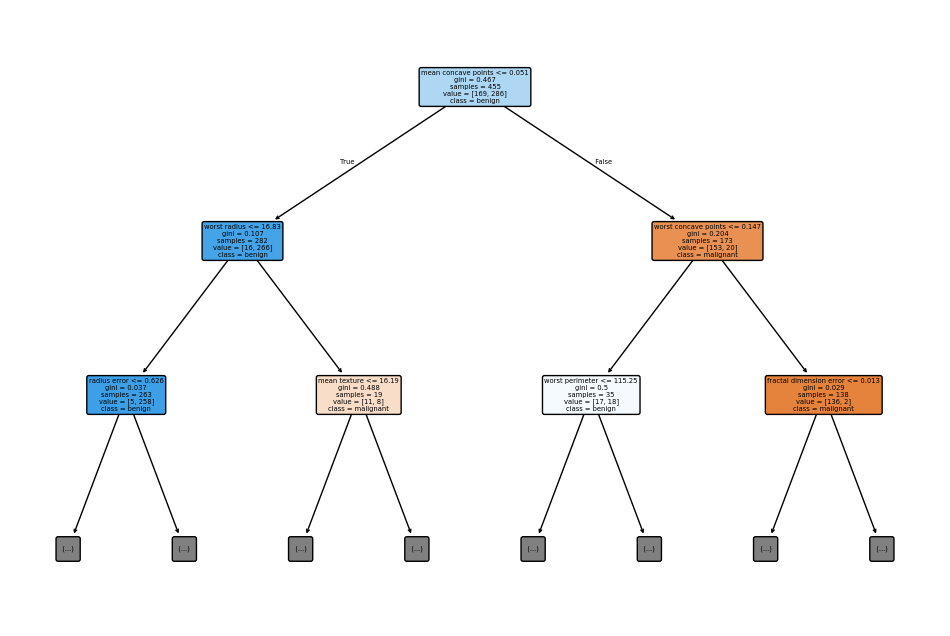

In [64]:
plt.figure(figsize=(12,8))

plot_tree(model_dt, 
          feature_names=data.feature_names, 
          class_names=data.target_names, 
          max_depth=2,
          filled=True,
          rounded=True)
        
plt.show

In [50]:
cr_rf = classification_report(y_test,y_pred_rf)
print("Random Forest: ",cr_rf)

Random Forest:                precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



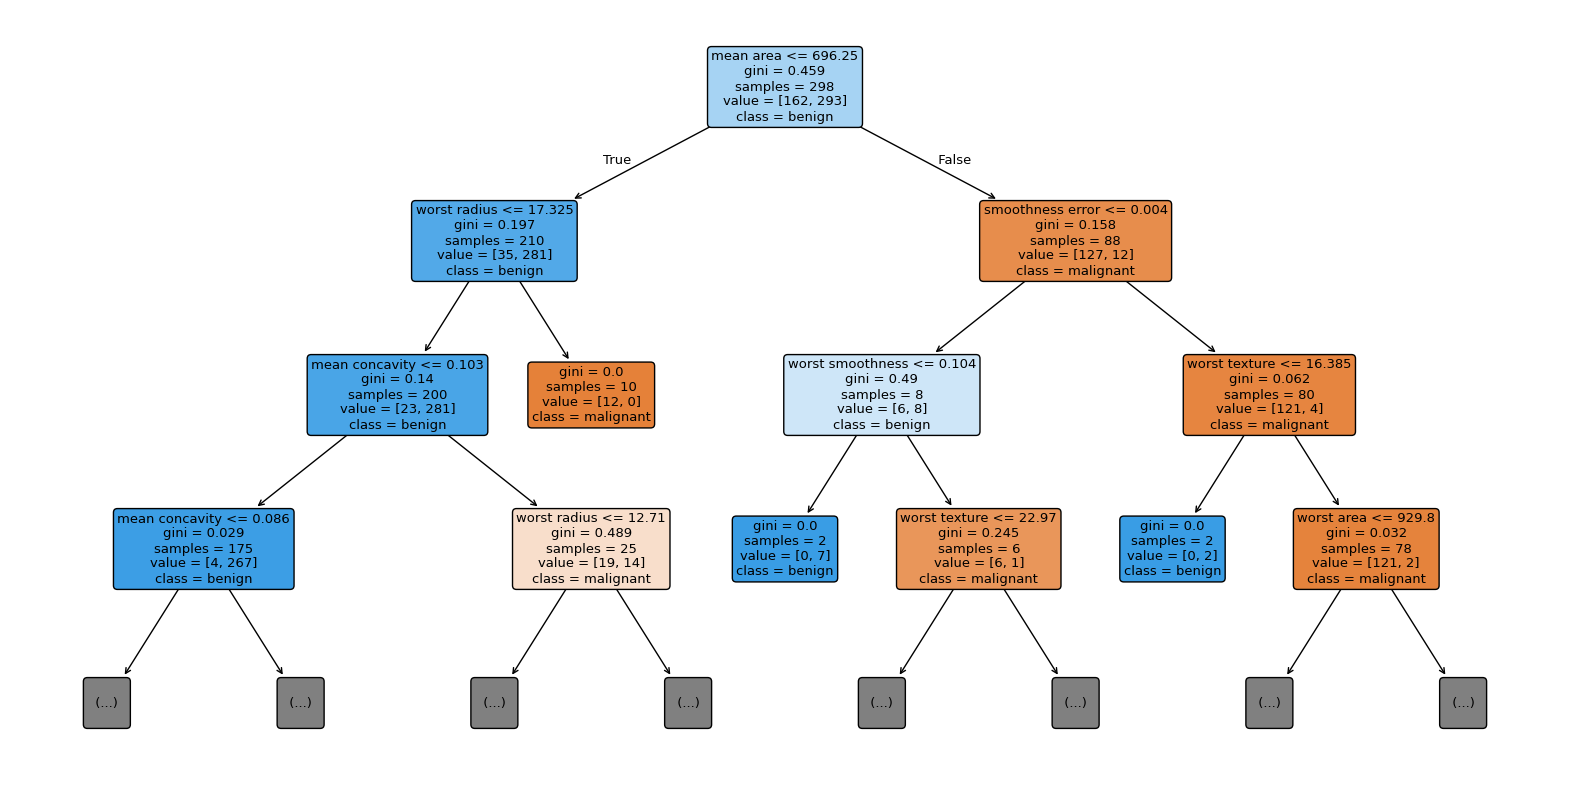

In [63]:
single_tree = model_rf.estimators_[0]

plt.figure(figsize=(20, 10), dpi=100)
plot_tree(single_tree, 
          feature_names=data.feature_names, 
          class_names=list(data.target_names), 
          max_depth=3, # Keeps the plot readable
          filled=True, 
          rounded=True);

In [51]:
cr_ada = classification_report(y_test,y_pred_ada)
print("AdaBoost: ",cr_ada)

AdaBoost:                precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [74]:
cr_knn = classification_report(y_test,y_pred_ada)
print("KNN: ",cr_ada)

confusion_matrix(y_test, y_pred_knn)

KNN:                precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



array([[38,  5],
       [ 0, 71]])

In [75]:
accuracy_score(y_test, y_pred_knn)

0.956140350877193

In [79]:
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model_rf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model_rf.score(X_test, y_test) * 100:.2f}%")
    print(" ")

Trying model with 10 estimators...
Model accuracy on test set: 95.61%
 
Trying model with 20 estimators...
Model accuracy on test set: 96.49%
 
Trying model with 30 estimators...
Model accuracy on test set: 95.61%
 
Trying model with 40 estimators...
Model accuracy on test set: 96.49%
 
Trying model with 50 estimators...
Model accuracy on test set: 96.49%
 
Trying model with 60 estimators...
Model accuracy on test set: 96.49%
 
Trying model with 70 estimators...
Model accuracy on test set: 96.49%
 
Trying model with 80 estimators...
Model accuracy on test set: 96.49%
 
Trying model with 90 estimators...
Model accuracy on test set: 96.49%
 
